# Example of Contractive Autoencoder with MNIST dataset

In [1]:
# Fist install the library

#%pip install aepy

Since Rapidae uses the new version of Keras 3, this allows the use of different backends. 
We can select among the 3 available backends (Tensorflow, Pytorch and Jax) by modifying the environment variable "KERAS_BACKEND".
In the next cell we can define it.

In [2]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

In [3]:
import sys

notebook_dir = os.path.abspath('')
sys.path.append(os.path.join(notebook_dir, '..'))

from keras import utils
from rapidae.data.datasets import load_MNIST
from rapidae.data.utils import display_diff
from rapidae.models.base.default_architectures import (VanillaEncoder, VanillaDecoder)
from rapidae.models.cae.cae_model import CAE
from rapidae.pipelines.training import TrainingPipeline

# Reproducibility in Keras. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
utils.set_random_seed(1)

2023-12-28 12:35:35.278332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 12:35:35.278364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 12:35:35.279132: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 12:35:35.283706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 12:35:35.790269: W tensorflow/compiler/tf2

### Download and preprocess the dataset

In this example, the selected dataset is the well-known MNIST composed of handwritten number images.

The "persistant" parameter of the load_MNIST() serves as a flag to determine if we want the dataset to be cached in the datasets folder.

Train and test data are normalized and flatten since we are going to use a non convolutional autoencoder.
 
Train and test labels are converted into one-hot encoding.

In [4]:
# Load MNIST dataset
x_train, y_train, x_test, y_test = load_MNIST(persistant=True)

x_train = x_train.reshape(x_train.shape[0], -1) / 255
x_test = x_test.reshape(x_test.shape[0], -1) / 255

# Obtaint number of clasess
n_classes = len(set(y_train))

# Convert labels to categorical
y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

2023-12-28 12:35:36 [INFO]: train-images-idx3-ubyte.gz already exists.
2023-12-28 12:35:36 [INFO]: train-labels-idx1-ubyte.gz already exists.
2023-12-28 12:35:36 [INFO]: t10k-images-idx3-ubyte.gz already exists.
2023-12-28 12:35:36 [INFO]: t10k-labels-idx1-ubyte.gz already exists.


### Model creation

In this step the model is created. Here we can define some parameters of the network as the dimensionality of the latent space, the type of encoder/decoder and the number of layers and neurons on them.
The model used in this example is a Contractive Autoencoder with vanilla MLP encoder and decoder. The encoder is composed of two MLP layers with 128 and 64 neurons on each one anf the decoder the same the other way around.

### Model creation

In this step the model is created. Here we can define some parameters of the network as the dimensionality of the latent space, the type of encoder/decoder and the number of layers and neurons on them.
The model used in this example is a Contractive Autoencoder with vanilla MLP encoder and decoder. The encoder is composed of two MLP layers with 128 and 64 neurons on each one anf the decoder the same the other way around.

In [5]:
# Model creation
model = CAE(input_dim=x_train.shape[1], latent_dim=10,
            encoder=VanillaEncoder, decoder=VanillaDecoder, layers_conf=[128, 64])

2023-12-28 12:35:37.163180: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-28 12:35:37.178357: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-28 12:35:37.178544: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### Training pipeline

In the next cell a TrainingPipeline is created. This pipeline is in responsible for setting the training hyperparameters for the autoencoder such as the number of epochs, the batch size, the learning rate...

We can also train the model by calling the pipeline and passing it the training set and the labels.

In [6]:
pipe = TrainingPipeline(name='training_pipeline',
                        model=model, num_epochs=20)

trained_model = pipe(x=x_train, y=y_train)

2023-12-28 12:35:37 [INFO]: +++ training_pipeline +++
2023-12-28 12:35:37 [INFO]: Creating folder in ../output_dir/training_pipeline_2023-12-28_12-35-37


Epoch 1/20


2023-12-28 12:35:38.366573: I external/local_xla/xla/service/service.cc:168] XLA service 0xb25b740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-28 12:35:38.366599: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-28 12:35:38.397643: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-28 12:35:38.530989: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1703763339.152354   29763 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: loss improved from inf to 0.05127, saving model to ../output_dir/training_pipeline_2023-12-28_12-35-37/model.weights.h5
469/469 - 3s - 7ms/step - contractive_loss: 6.6056e-04 - loss: 0.0513 - reconstruction_loss: 0.0506
Epoch 2/20

Epoch 2: loss improved from 0.05127 to 0.02689, saving model to ../output_dir/training_pipeline_2023-12-28_12-35-37/model.weights.h5
469/469 - 1s - 1ms/step - contractive_loss: 3.8881e-04 - loss: 0.0269 - reconstruction_loss: 0.0265
Epoch 3/20

Epoch 3: loss improved from 0.02689 to 0.02248, saving model to ../output_dir/training_pipeline_2023-12-28_12-35-37/model.weights.h5
469/469 - 1s - 1ms/step - contractive_loss: 3.2457e-04 - loss: 0.0225 - reconstruction_loss: 0.0222
Epoch 4/20

Epoch 4: loss improved from 0.02248 to 0.01952, saving model to ../output_dir/training_pipeline_2023-12-28_12-35-37/model.weights.h5
469/469 - 1s - 1ms/step - contractive_loss: 3.1023e-04 - loss: 0.0195 - reconstruction_loss: 0.0192
Epoch 5/20

Epoch 5: loss improved 

### Evaluation step

Once the model is trained we can evaluate the model with the test set and compare the reconstructed images to see the model performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


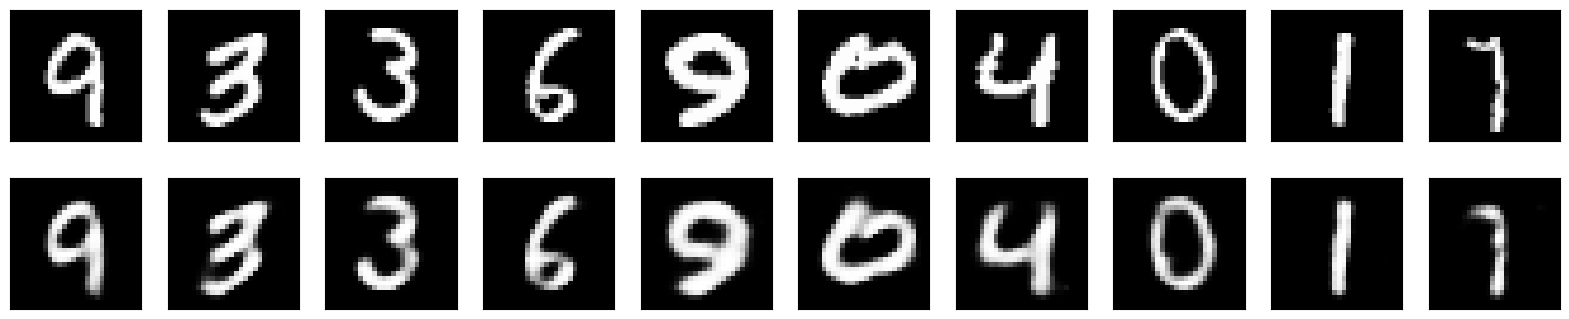

In [7]:
y_hat = trained_model.predict(x_test)

display_diff(x_test, y_hat['recon'])